# Features for Microglia in P6 mouse Cortex

In [1]:
! pip install scanpy
! pip install scProject -U
import numpy as np
import scProject
import scanpy as sc
patterns = sc.read_h5ad('patterns_anndata.h5ad')
dataset = sc.read_h5ad('test_target.h5ad')
dataset_filtered, patterns_filtered = scProject.matcher.filterAnnDatas(dataset, patterns, 'gene_id')



Requirement already up-to-date: scProject in /Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages (1.0.9.5)
(55371, 428) dataset filter shape
(80, 428) patterns filter shape


Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.


Low regularization low 1% lasso

(55371, 80)
[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


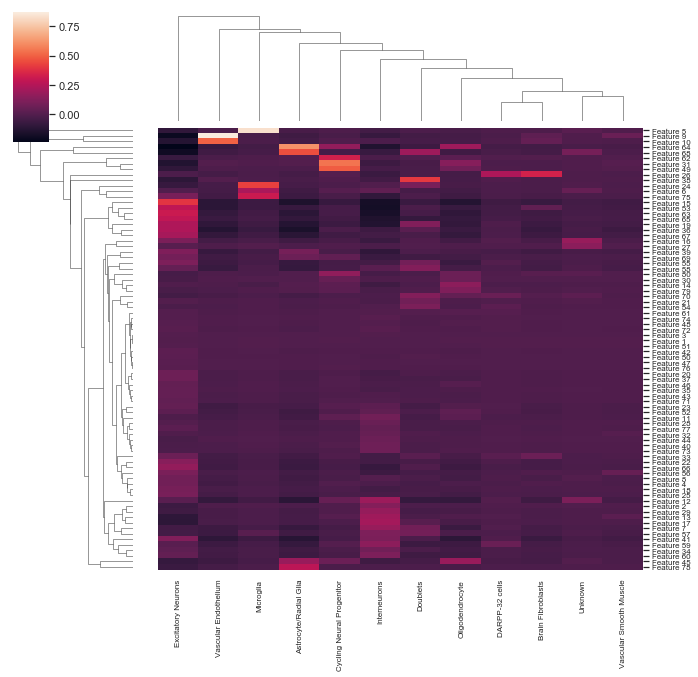

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= [10, 12]
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'MG01', .00001, .01)
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'MG01', 'MG01Pears', True)

[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


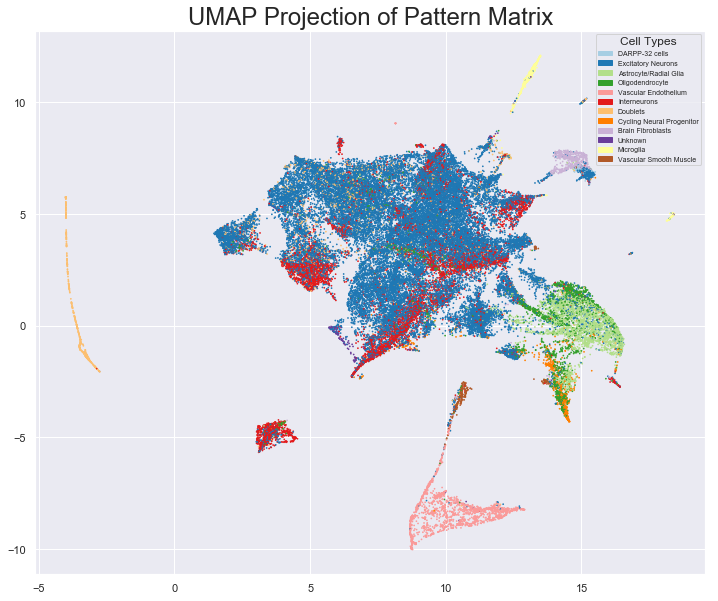

In [3]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'CellType', 'MG01', 'UMAPMG01', 20)

Number of nonzero cells 1573


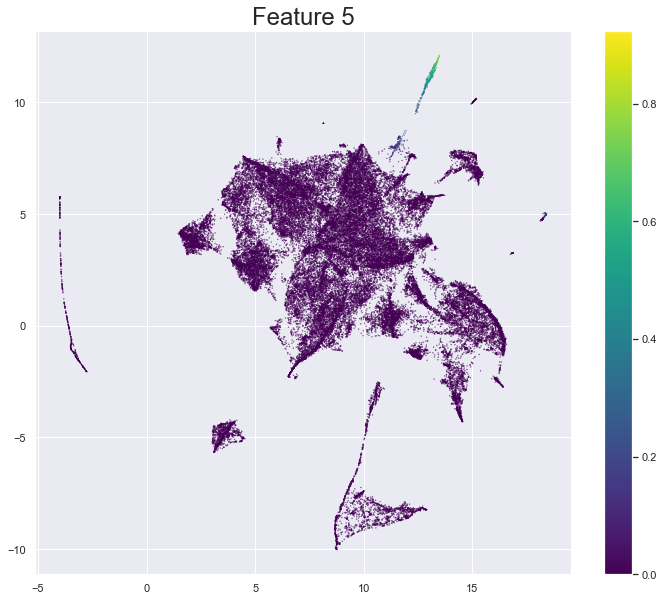

Number of nonzero cells 5082


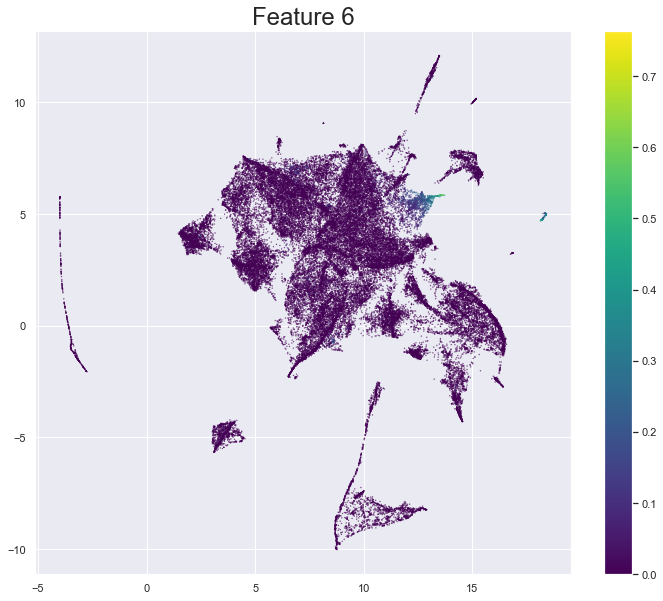

Number of nonzero cells 3993


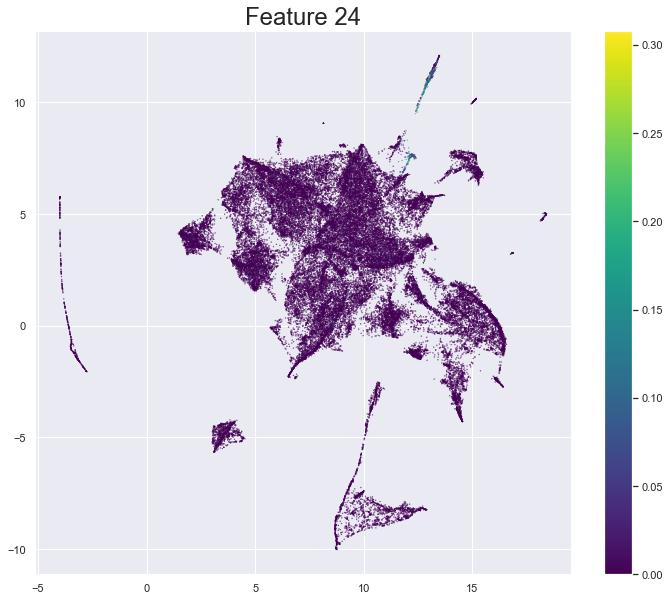

Number of nonzero cells 6289


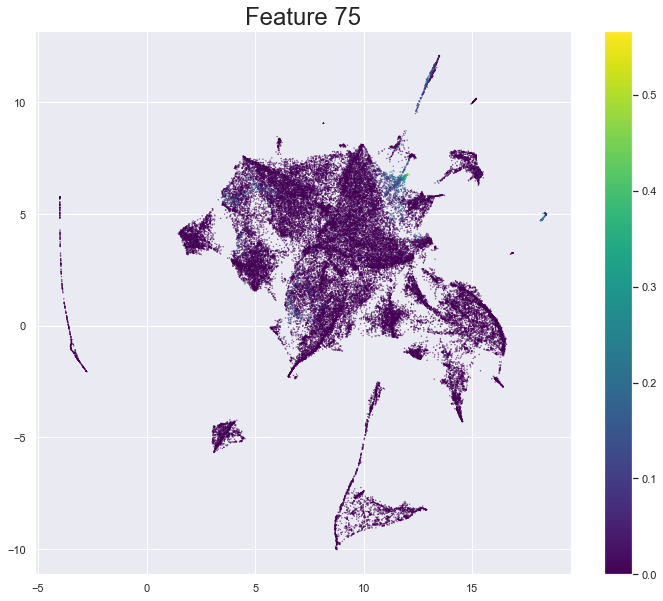

In [4]:
scProject.viz.featurePlots(dataset_filtered, [5, 6, 24, 75], 'MG01', 'UMAPMG01')

As expected from the Pearson plot, features 5 and 24 are the stronger markers of microglia in the P6 mouse cortex. Lets up the lasso to encourage sparsity and strengthen the features that are the real drivers.

(55371, 80)
[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


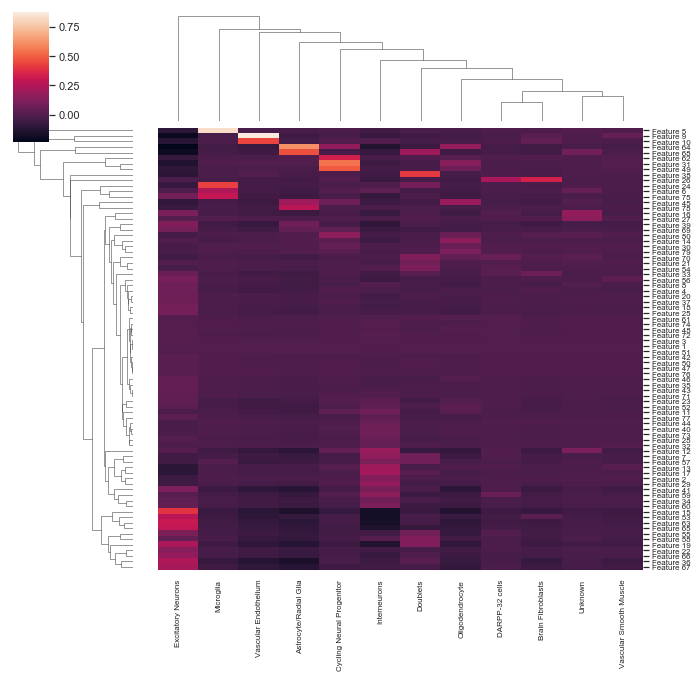

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= [10, 12]
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'MG99', .00001, .99)
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'MG99', 'MG99Pears', True)

[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


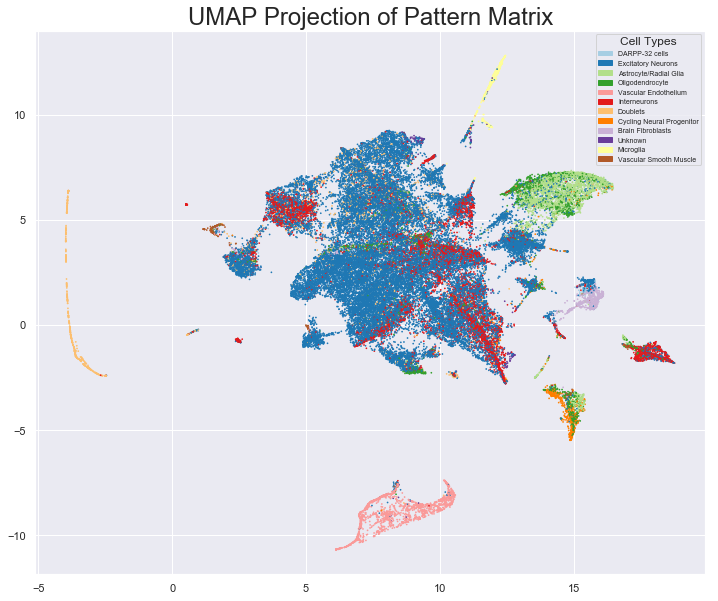

In [6]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'CellType', 'MG99', 'UMAPMG99', 20)

One nice feature of scProject is that you can use the UMAP coordinates generated from a previous regression. This can be useful when you increase the regularization and the UMAPs become harder to decipher. These are the feature plots, but on the original UMAP coordinates.

Number of nonzero cells 1236


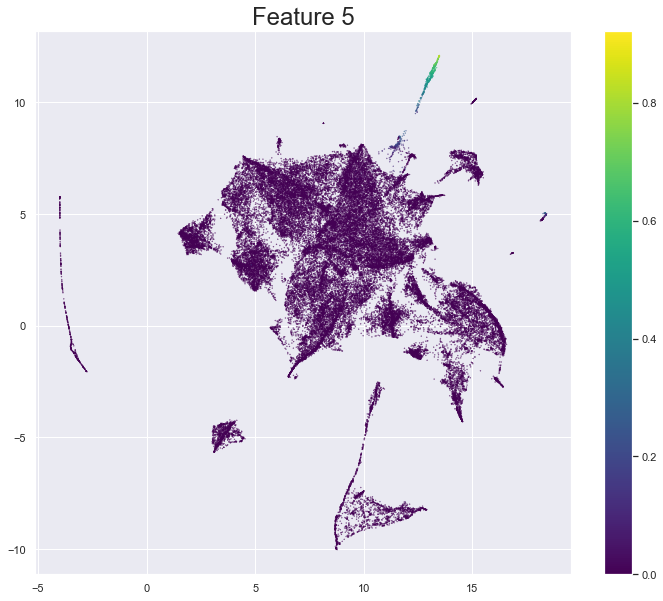

Number of nonzero cells 4285


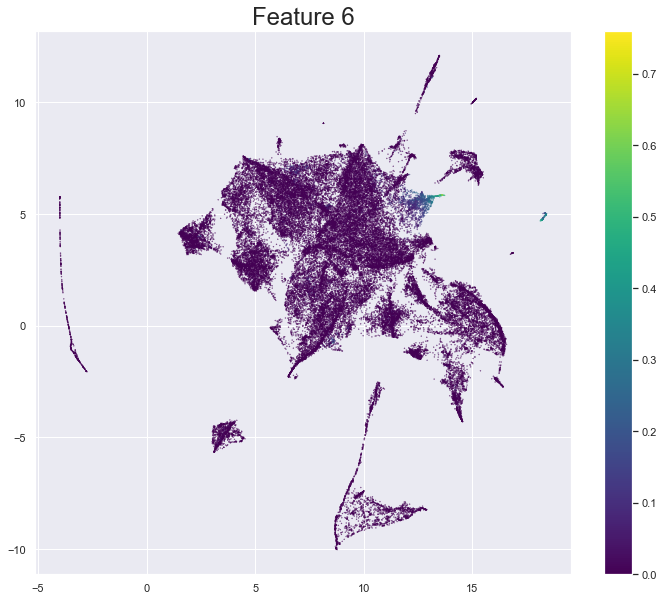

Number of nonzero cells 3550


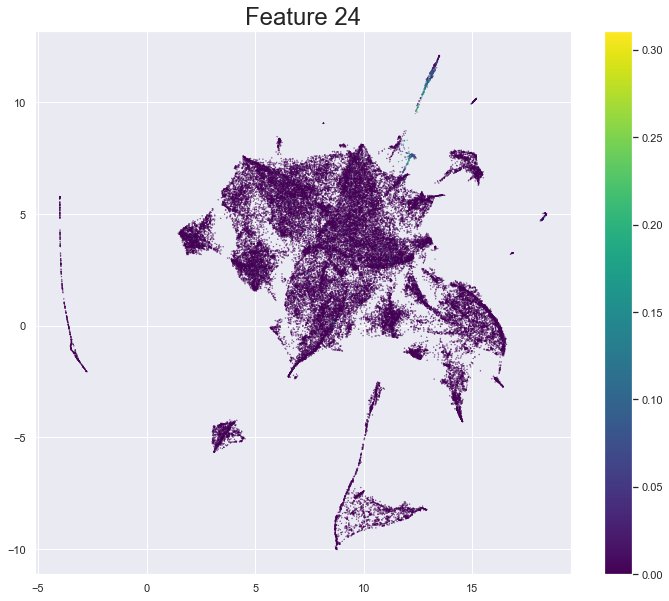

Number of nonzero cells 5021


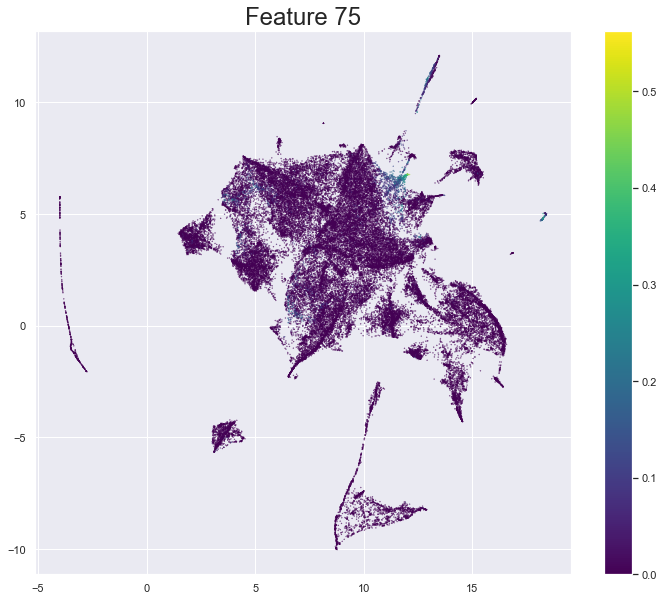

In [7]:
scProject.viz.featurePlots(dataset_filtered, [5, 6, 24, 75], 'MG99', 'UMAPMG01')

This is the typical feature weights on a newly generated UMAP coordinate system.

Number of nonzero cells 1236


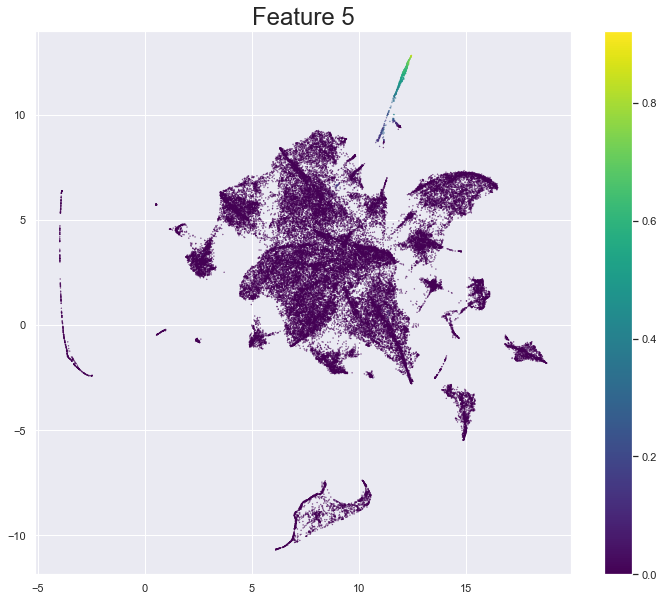

Number of nonzero cells 4285


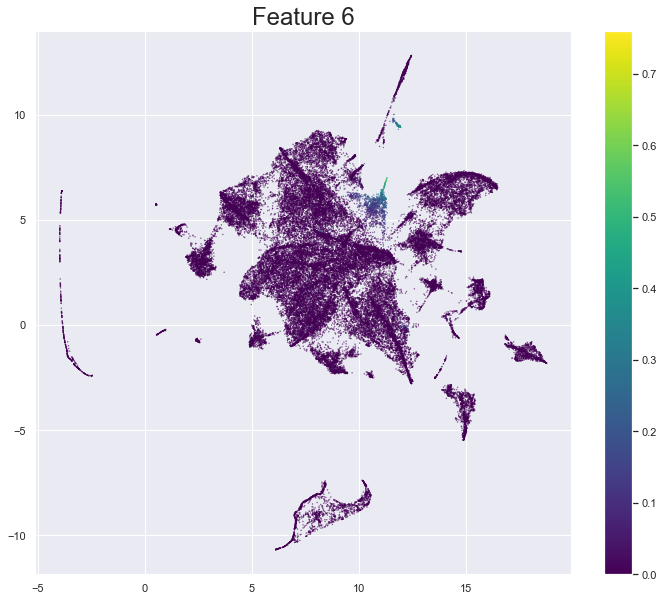

Number of nonzero cells 3550


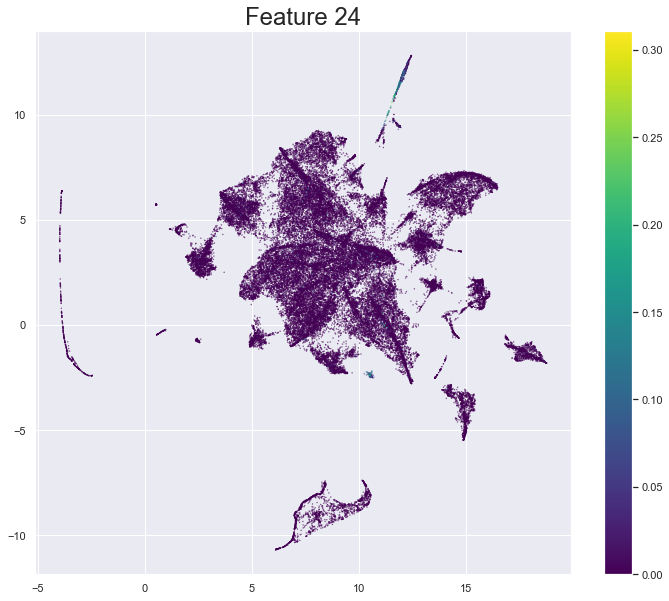

Number of nonzero cells 5021


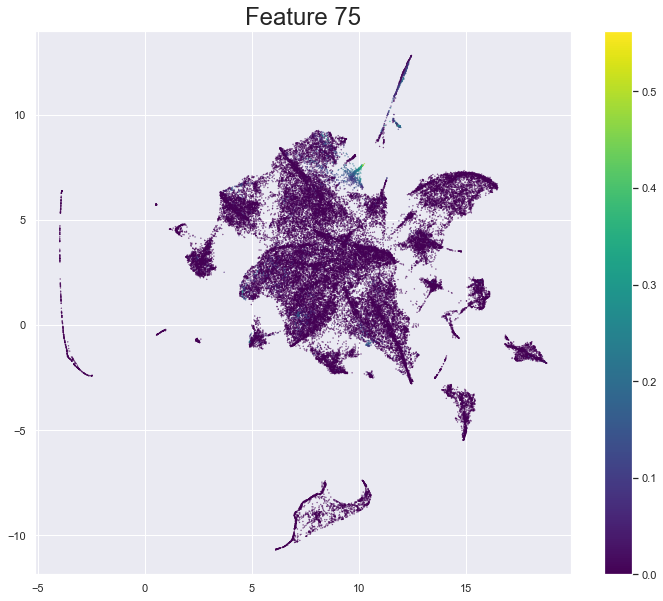

In [8]:
scProject.viz.featurePlots(dataset_filtered, [5, 6, 24, 75], 'MG99', 'UMAPMG99')

While this is clearly over regularized some features 5, 6 and 75(because of how many nonzero cells) persist. Lets print out the highest expressed genes from the features of interest and see what's inside.

In [9]:
print(scProject.stats.importantGenes(patterns_filtered, 5, .3), "Feature 5 Genes")
print(scProject.stats.importantGenes(patterns_filtered, 6, .3), "Feature 6 Genes")
print(scProject.stats.importantGenes(patterns_filtered, 24, .3), "Feature 24 Genes")
print(scProject.stats.importantGenes(patterns_filtered, 75, .3), "Feature 75 Genes")

[Index([], dtype='object', name='index')] Feature 5 Genes
[Index([], dtype='object', name='index')] Feature 6 Genes
[Index(['ENSMUSG00000049775', 'ENSMUSG00000002985'], dtype='object', name='index')] Feature 24 Genes
[Index([], dtype='object', name='index')] Feature 75 Genes


In short, Feature 24 which is expressed in a fraction of microglia has high expression of C1qa, C1qb, C1qc genes. Feature 24 is not included in all of the microglia suggesting that there exists a subtype of microglia in the P6 mouse cortex that expresses C1qa through c in much higher amounts. Features 5, 6, and 75 do not have the C1qs expressed in their most important genes. This shows a subtyping of microglia in terms of expression of C1q expression.

To better understand the expression of C1q a-c, lets use gene selectivity to understand what the model is doing.

Feature 5 expresses 11.083000153303146% of gene ENSMUSG00000036887
Feature 6 expresses 7.832718640565872% of gene ENSMUSG00000036887
Feature 24 expresses 44.47410702705383% of gene ENSMUSG00000036887


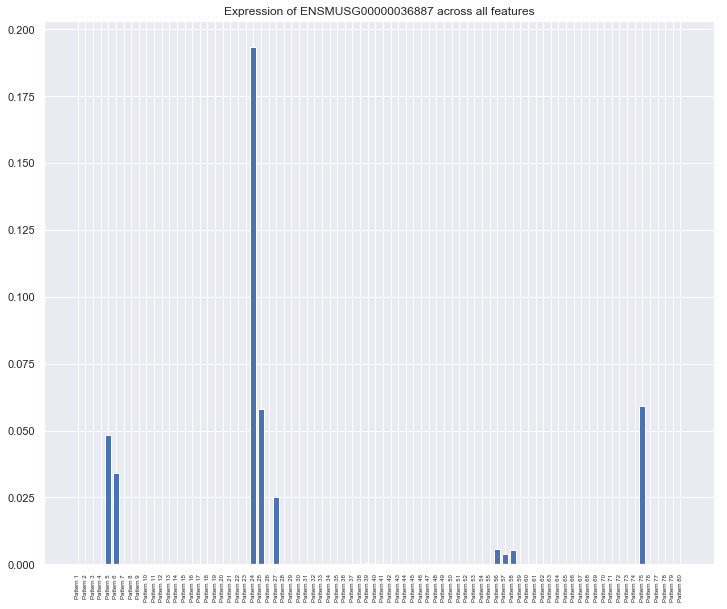

Feature 5 expresses 12.099885195493698% of gene ENSMUSG00000036905
Feature 6 expresses 11.364411562681198% of gene ENSMUSG00000036905
Feature 24 expresses 35.02193987369537% of gene ENSMUSG00000036905


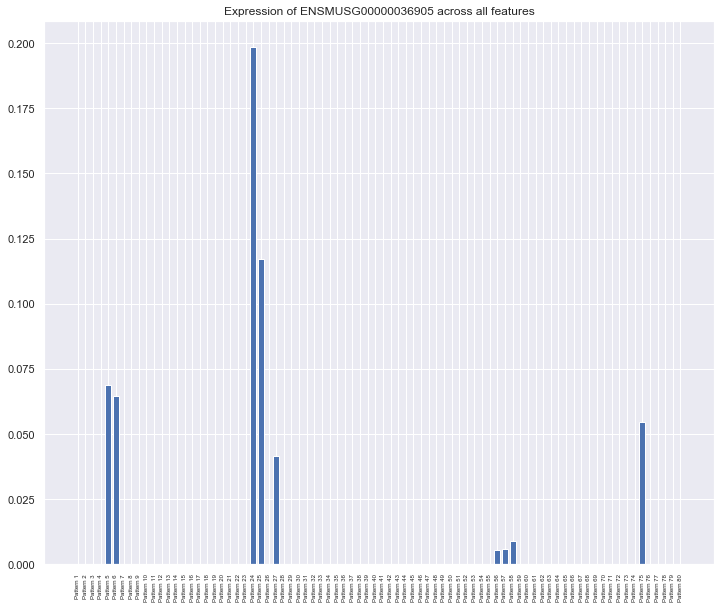

Feature 5 expresses 12.562157213687897% of gene ENSMUSG00000036896
Feature 6 expresses 8.364727348089218% of gene ENSMUSG00000036896
Feature 24 expresses 37.7030223608017% of gene ENSMUSG00000036896


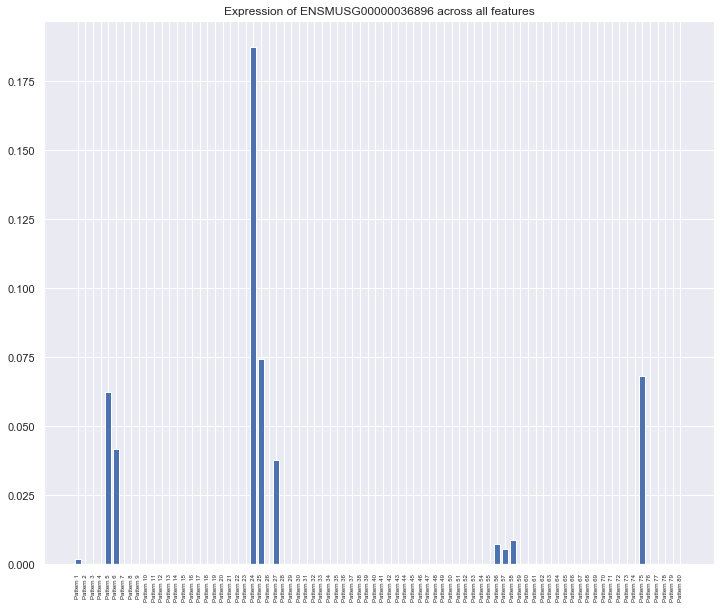

(582, 80)


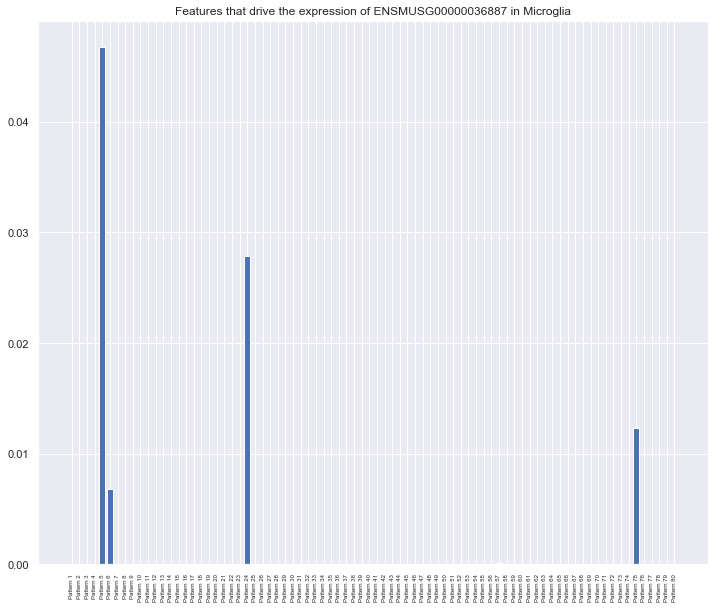

(582, 80)


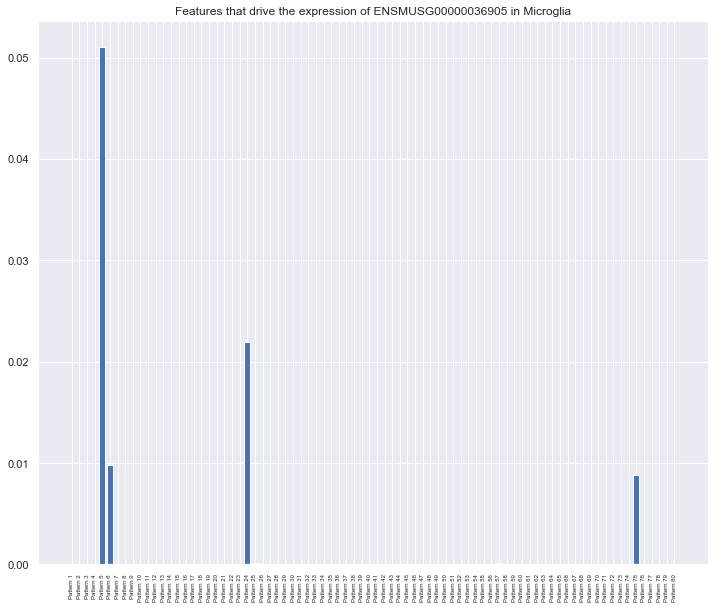

(582, 80)


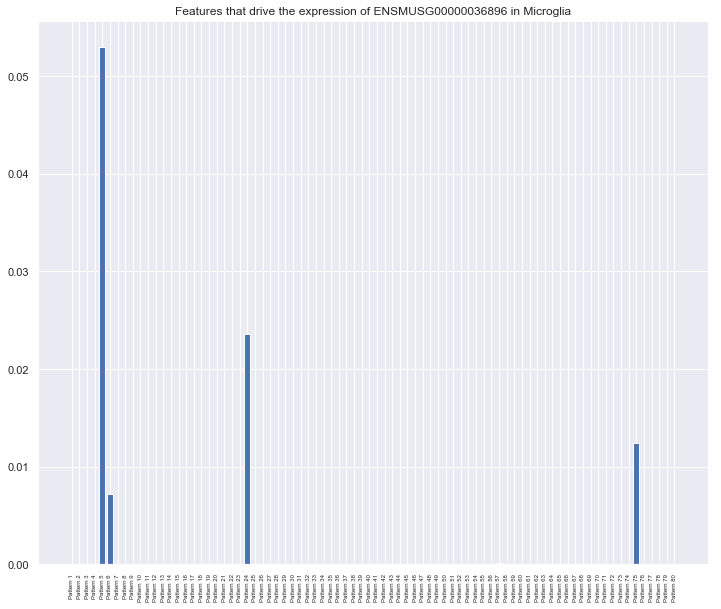

In [10]:
scProject.stats.geneSelectivity(patterns_filtered, 'ENSMUSG00000036887', 5, False) #C1qa
scProject.stats.geneSelectivity(patterns_filtered, 'ENSMUSG00000036887', 6, False) #C1qa
scProject.stats.geneSelectivity(patterns_filtered, 'ENSMUSG00000036887', 24, True) #C1qa

scProject.stats.geneSelectivity(patterns_filtered, 'ENSMUSG00000036905', 5, False) #C1qb
scProject.stats.geneSelectivity(patterns_filtered, 'ENSMUSG00000036905', 6, False) #C1qb
scProject.stats.geneSelectivity(patterns_filtered, 'ENSMUSG00000036905', 24, True) #C1qb

scProject.stats.geneSelectivity(patterns_filtered, 'ENSMUSG00000036896', 5, False) #C1qc
scProject.stats.geneSelectivity(patterns_filtered, 'ENSMUSG00000036896', 6, False) #C1qc
scProject.stats.geneSelectivity(patterns_filtered, 'ENSMUSG00000036896', 24, True) #C1qc

scProject.stats.geneDriver(dataset_filtered, patterns_filtered, 'ENSMUSG00000036887', 'CellType',
                                       "Microglia", "MG99")
scProject.stats.geneDriver(dataset_filtered, patterns_filtered, 'ENSMUSG00000036905', 'CellType',
                                       "Microglia", "MG99")
scProject.stats.geneDriver(dataset_filtered, patterns_filtered, 'ENSMUSG00000036896', 'CellType',
                                       "Microglia", "MG99")

The model chose the best features to use in the samples. As we saw in the previous plots, feature 5 is the largest driver of microglia. It is important to note that these plots take the average of all of the cells annotated as microglia, but from the feature plots we know that some microglia express more of feature 6 and others more feature 24. The first plots clearly show that feature 24 expresses much more of all three genes.